In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

random.seed(0)


In [2]:
data = pd.read_csv("bank-additional-full.csv", sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
#dropping duration as mentioned in the description.
data = data.drop(['duration'], axis=1)

In [21]:
data.shape

(41188, 20)

In [34]:
#checking null values in each column..
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [22]:
#checking the type of columns...
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [68]:
#Target Variable..
data['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

This is class imbalanced dataset. Only 12% of the samples are from "yes" and 89% from "no".

In [30]:
#scaling all numerical variables..

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] = sc.fit_transform(data[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])


D:\Installation_File\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Installation_File\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
#label encoding all categorical variables..

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_list = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week','poutcome']

for i in cat_list:
    data[i] = le.fit_transform(data[i])

In [35]:
#creating dummy variables for all categorical variables..

data = pd.get_dummies(data, columns=cat_list)

In [39]:
#deleting the first dummy column of each feature to avoid dummy variable trap...
data = data.drop(['job_0','marital_0','education_0','default_0','housing_0','loan_0','month_0','day_of_week_0','poutcome_0'], axis=1)

In [40]:
data.shape

(41188, 54)

In [41]:
data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_1,poutcome_2
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,no,...,1,0,0,0,1,0,0,0,1,0
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,no,...,1,0,0,0,1,0,0,0,1,0
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,no,...,1,0,0,0,1,0,0,0,1,0
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,no,...,1,0,0,0,1,0,0,0,1,0
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,no,...,1,0,0,0,1,0,0,0,1,0


In [42]:
X = data.drop(['y'], axis=1)
y = data['y']

In [45]:
#splitting the data into training, validation and testing...

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
xtr, xval, ytr, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)

In [79]:
#Baseline model..

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def fit_model(model, x, y):
    model.fit(x, y)
    model_pred = model.predict(xtest)
    print("Training Accuracy: {}".format(model.score(xtr, ytr)))
    print("Test Accuracy: {}".format(model.score(xtest,ytest)))
    cm = confusion_matrix(ytest, model_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    print(" ")
    print(classification_report(ytest, model_pred))

D:\Installation_File\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy: 0.9011380880121396
Test Accuracy: 0.8990046127700898
 
              precision    recall  f1-score   support

          no       0.91      0.98      0.95      7319
         yes       0.64      0.22      0.33       919

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.77      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



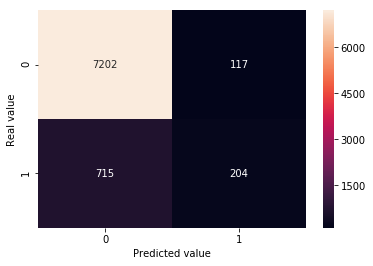

In [60]:
#1. Logistic Regression
lr = LogisticRegression()
fit_model(lr)

Okay, the baseline model is giving us a good score with around 90% test accuracy. But the problem is that if you look at the recall value for "yes", it is only 22%, i.e. 78% of the time the model is predicting "no" for customers who actually subscribed to a term deposit.

Training Accuracy: 0.9957511380880122
Test Accuracy: 0.8943918426802622
 
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7319
         yes       0.55      0.29      0.38       919

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



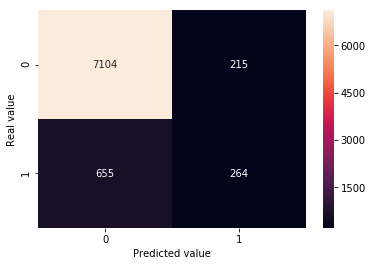

In [66]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
fit_model(rf)

Training Accuracy: 0.906525037936267
Test Accuracy: 0.899368778829813
 
              precision    recall  f1-score   support

          no       0.91      0.98      0.95      7319
         yes       0.62      0.24      0.35       919

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.77      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238



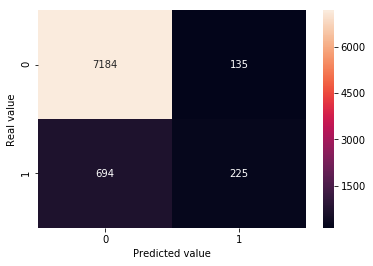

In [67]:
# GradientBoosting

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
fit_model(gbc)

Well, when I used ensemble methods - RandomForest is overfitting. But GradientBoosting is performing slightly better than Logistic Regression based on customers who actually subscribed to a term deposit.

Now, we know that this dataset is class imbalanced, so we will solve for this.

In [78]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(xtr, ytr)

Counter(y_res)

Counter({'yes': 23388, 'no': 23388})

Training Accuracy: 0.8867223065250379
Test Accuracy: 0.8862588006797767
 
              precision    recall  f1-score   support

          no       0.93      0.94      0.94      7319
         yes       0.49      0.45      0.47       919

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.71      0.70      0.70      8238
weighted avg       0.88      0.89      0.88      8238



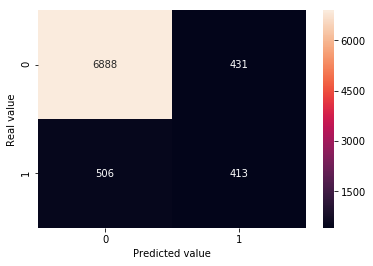

In [81]:
fit_model(gbc,X_res, y_res)

okay, so using over-sampling technique to increase the samples for minority class, we tend to increase the recall percentage of customers who actually subscribed to a term deposit upto 45%. Although, recall % for "no" class decreased a little, that won't affect much, because our job is to correctly predict the customers who will subscribe to a term deposit.

Lets look at the feature importance score..

Text(0, 0.5, 'Feature Importance Score')

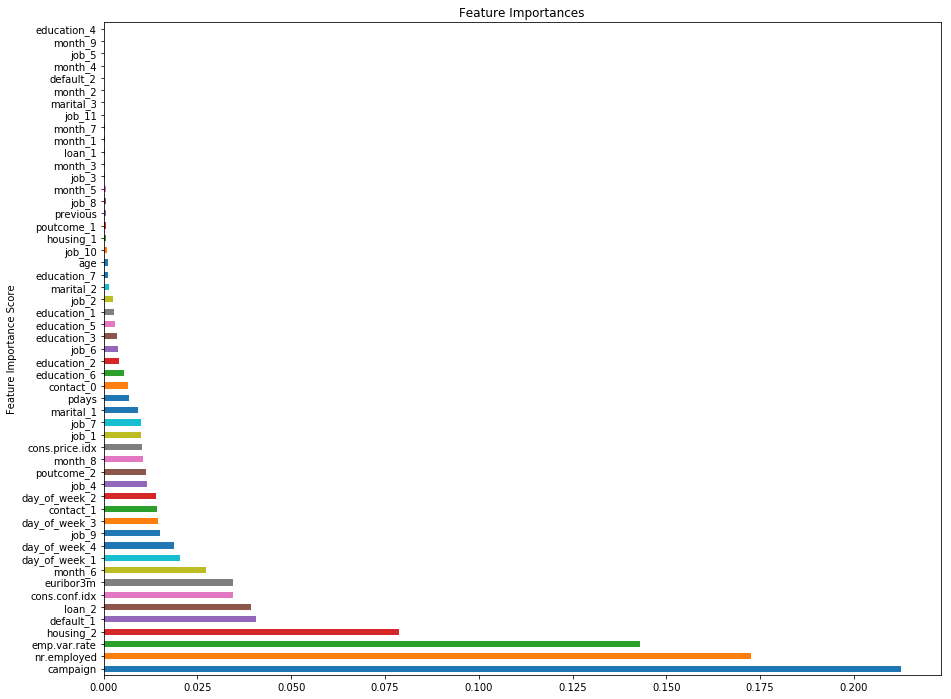

In [95]:
gbc.fit(X_res, y_res)
feature_names = X.columns
feat_imp = pd.Series(gbc.feature_importances_, feature_names)
feat_imp = feat_imp.sort_values(ascending=False)
plt.figure(figsize=[15,12])
feat_imp.plot(kind='barh', title='Feature Importances', rot=0)
plt.ylabel('Feature Importance Score')

9 features explains ~ 97% of the data.

Training Accuracy: 0.8867223065250379
Test Accuracy: 0.8862588006797767
 
              precision    recall  f1-score   support

          no       0.93      0.94      0.94      7319
         yes       0.49      0.45      0.47       919

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.71      0.70      0.70      8238
weighted avg       0.88      0.89      0.88      8238



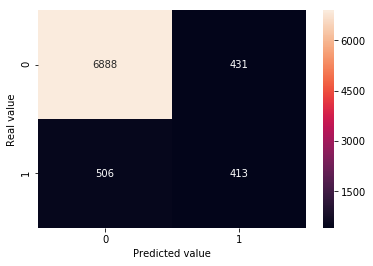

In [116]:
gbc = GradientBoostingClassifier()
fit_model(gbc,X_res, y_res)

Test Accuracy: 0.8855842185128984
 
              precision    recall  f1-score   support

          no       0.93      0.94      0.94      5841
         yes       0.50      0.48      0.49       749

   micro avg       0.89      0.89      0.89      6590
   macro avg       0.72      0.71      0.71      6590
weighted avg       0.88      0.89      0.88      6590



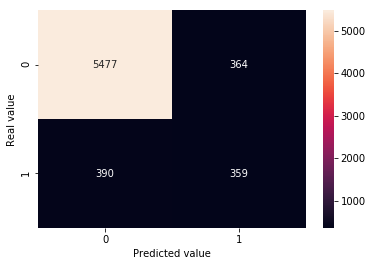

In [117]:
#predicting on the validation set..

model_pred = gbc.predict(xval)
    #print("Training Accuracy: {}".format(model.score(xtr, ytr)))
print("Test Accuracy: {}".format(gbc.score(xval,yval)))
cm = confusion_matrix(yval, model_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print(" ")
print(classification_report(yval, model_pred))

The model performs well on the validation set as well. 